<a href="https://colab.research.google.com/github/pranavkagrawal02/Minor-In-AI-IIT-Ropar/blob/main/Feb_27_df_operations_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: generate two data frames. one with e-commerce items with their specifications and another with their sales data. then merge them. demo how the merge of two data frames happens.

import pandas as pd

# Create the first DataFrame with item specifications
data1 = {'item_id': [1, 2, 3, 4, 5],
        'item_name': ['Laptop', 'Tablet', 'Smartphone', 'Headphones', 'Keyboard'],
        'brand': ['Dell', 'Samsung', 'Apple', 'Sony', 'Logitech'],
        'price': [1200, 300, 800, 100, 75]}
df1 = pd.DataFrame(data1)

# Create the second DataFrame with sales data
data2 = {'item_id': [1, 2, 3, 4, 6],  # Note: item_id 6 is in sales but not in specifications
        'sales_date': ['2024-01-15', '2024-01-20', '2024-01-25', '2024-01-30', '2024-02-05'],
        'quantity_sold': [5, 10, 8, 12, 3]}
df2 = pd.DataFrame(data2)

# Merge the two dataframes based on the 'item_id' column
# Inner merge: only items present in both dataframes will be included
merged_df_inner = pd.merge(df1, df2, on='item_id', how='inner')
print("Inner Merge:")
print(merged_df_inner)

# Left merge: all items from the left (df1) will be included,
# and matching items from the right (df2) will be added.
# Non-matching items in df2 will have NaN values.
merged_df_left = pd.merge(df1, df2, on='item_id', how='left')
print("\nLeft Merge:")
print(merged_df_left)


# Right merge: all items from the right (df2) will be included,
# and matching items from the left (df1) will be added.
# Non-matching items in df1 will have NaN values.
merged_df_right = pd.merge(df1, df2, on='item_id', how='right')
print("\nRight Merge:")
print(merged_df_right)


# Outer merge: all items from both dataframes will be included
# Non-matching items will have NaN values for the columns of the other dataframe.
merged_df_outer = pd.merge(df1, df2, on='item_id', how='outer')
print("\nOuter Merge:")
print(merged_df_outer)


Inner Merge:
   item_id   item_name    brand  price  sales_date  quantity_sold
0        1      Laptop     Dell   1200  2024-01-15              5
1        2      Tablet  Samsung    300  2024-01-20             10
2        3  Smartphone    Apple    800  2024-01-25              8
3        4  Headphones     Sony    100  2024-01-30             12

Left Merge:
   item_id   item_name     brand  price  sales_date  quantity_sold
0        1      Laptop      Dell   1200  2024-01-15            5.0
1        2      Tablet   Samsung    300  2024-01-20           10.0
2        3  Smartphone     Apple    800  2024-01-25            8.0
3        4  Headphones      Sony    100  2024-01-30           12.0
4        5    Keyboard  Logitech     75         NaN            NaN

Right Merge:
   item_id   item_name    brand   price  sales_date  quantity_sold
0        1      Laptop     Dell  1200.0  2024-01-15              5
1        2      Tablet  Samsung   300.0  2024-01-20             10
2        3  Smartphone    A

        item_id       price
count  5.000000     5.00000
mean   3.000000   495.00000
std    1.581139   490.02551
min    1.000000    75.00000
25%    2.000000   100.00000
50%    3.000000   300.00000
75%    4.000000   800.00000
max    5.000000  1200.00000


<Axes: >

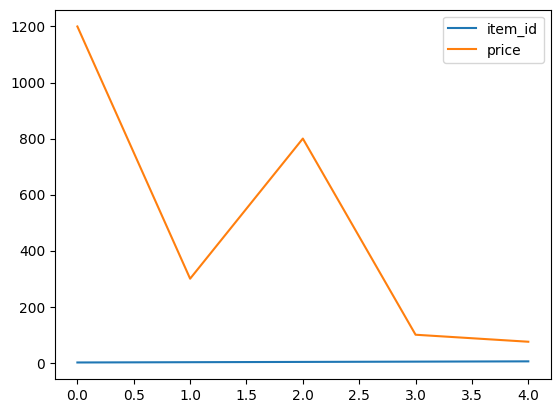

In [ ]:
# Get the Decriptive Statistics and Graphs
print(df1.describe())

df1.plot()

In [ ]:
import pandas as pd
import numpy as np

data = {
    'Student': ['A', 'B', 'C'],
    'Test 1': [8, np.nan, 7],
    'Test 2': [8, 9, 7],
    'Test 3': [8, 8, np.nan],
    'Test 4': [np.nan, 6, 7],
    'Test 5': [10, 7, 9]
}

df = pd.DataFrame(data)
print(df)

df_fill_8 = df.fillna(8)
print(df_fill_8)


  Student  Test 1  Test 2  Test 3  Test 4  Test 5
0       A     8.0       8     8.0     NaN      10
1       B     NaN       9     8.0     6.0       7
2       C     7.0       7     NaN     7.0       9
  Student  Test 1  Test 2  Test 3  Test 4  Test 5
0       A     8.0       8     8.0     8.0      10
1       B     8.0       9     8.0     6.0       7
2       C     7.0       7     8.0     7.0       9


In [ ]:
import pandas as pd
import numpy as np

# Sample DataFrame with NaN values
data = {
    'item_id': [101, 102, 103, 104, 105],
    'item': ['Apple', 'Banana', 'Orange', np.nan, 'Grapes'],
    'price': [50, np.nan, 30, 40, np.nan],
    'sales': [200, 150, np.nan, 180, 220]
}

df = pd.DataFrame(data)

print("Original DataFrame with NaN values:")
print(df)

# 1. Fill NaN with a specific value
df1 = df.fillna(0)

# 2. Fill NaN in a specific column with a fixed value
df2 = df.copy()
df2['price'] = df2['price'].fillna(df2['price'].mean())  # Filling NaN with mean value

# 3. Fill NaN using forward fill (propagate last valid value forward)
df3 = df.ffill()

# 4. Fill NaN using backward fill (propagate next valid value backward)
df4 = df.bfill()

# 5. Fill NaN with the median value of the column
df5 = df.copy()
df5['price'] = df5['price'].fillna(df5['price'].median())

# 6. Fill NaN with the mode (most frequent value) of a column
df6 = df.copy()
df6['item'] = df6['item'].fillna(df6['item'].mode()[0])

# 7. Fill NaN using interpolation
df7 = df.copy()
df7['sales'] = df7['sales'].interpolate()

# 8. Fill NaN using a dictionary of values for each column
df8 = df.fillna({'item': 'Unknown', 'price': 45, 'sales': 95 })

# 9. Drop rows containing NaN values
df9 = df.dropna()

# Displaying results
print("\nFill NaN with 0:\n", df1)
print("\nFill NaN in 'price' with mean:\n", df2)
print("\nForward Fill (ffill):\n", df3)
print("\nBackward Fill (bfill):\n", df4)
print("\nFill NaN in 'price' with median:\n", df5)
print("\nFill NaN in 'item' with mode:\n", df6)
print("\nInterpolate missing values in 'sales':\n", df7)
print("\nFill NaN with a dictionary:\n", df8)
print("\nDrop rows with NaN:\n", df9)


Original DataFrame with NaN values:
   item_id    item  price  sales
0      101   Apple   50.0  200.0
1      102  Banana    NaN  150.0
2      103  Orange   30.0    NaN
3      104     NaN   40.0  180.0
4      105  Grapes    NaN  220.0

Fill NaN with 0:
    item_id    item  price  sales
0      101   Apple   50.0  200.0
1      102  Banana    0.0  150.0
2      103  Orange   30.0    0.0
3      104       0   40.0  180.0
4      105  Grapes    0.0  220.0

Fill NaN in 'price' with mean:
    item_id    item  price  sales
0      101   Apple   50.0  200.0
1      102  Banana   40.0  150.0
2      103  Orange   30.0    NaN
3      104     NaN   40.0  180.0
4      105  Grapes   40.0  220.0

Forward Fill (ffill):
    item_id    item  price  sales
0      101   Apple   50.0  200.0
1      102  Banana   50.0  150.0
2      103  Orange   30.0  150.0
3      104  Orange   40.0  180.0
4      105  Grapes   40.0  220.0

Backward Fill (bfill):
    item_id    item  price  sales
0      101   Apple   50.0  200.0
1    